<a href="https://colab.research.google.com/github/A01704567/Repositorio1/blob/main/07_2_actividad_visualizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad - Estadística básica

* **Nombre: Sofía Blanco Prigmore**
* **Matrícula: A01704567**

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio.
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite.

Carga el conjunto de datos `bestsellers with categories.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [4]:
# Carga las librerías necesarias.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
df = pd.read_csv('bestsellers with categories.csv')
df.head(6)

Saving bestsellers with categories.csv to bestsellers with categories.csv
User uploaded file "bestsellers with categories.csv" with length 51161 bytes


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.

Las variables que contiene son:
* **Name**: Nombre del libro.
* **Author**: Autor.
* **User Rating**: Calificación promedio que los usuarios asignaron al libro (1-5).
* **Reviews**: Número de reseñas.
* **Price**: Precio del libro.
* **Year**: Año de publicación.
* **Genre**: Género literario (ficción/no ficción).

In [3]:
# Crea una tabla resumen con los estadísticas generales de las variables
# numéricas.
df.describe()



,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


No handles with labels found to put in legend.


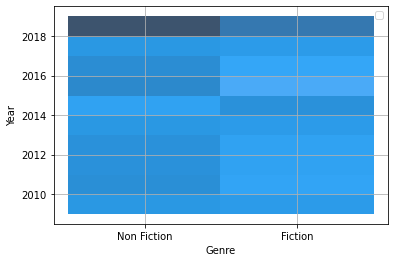

In [40]:
## ¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.
#genre, ficcion & non ficcion and how many publications a year 
# Configuramos el tamaño de imagen
sns.histplot(data=df, x='Genre', y = 'Year' , bins=10, kde= True)

# Aquí la leyenda hace mucho más sentido
plt.legend(loc='best')

# Agregamos la cuadrícula para que se vea mejor
plt.grid(True)

In [44]:
# ¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún 
# año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.
pd.crosstab(df['Genre'], df['Year'])


Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Genre,,,,,,,,,,,
Fiction,24,20,21,21,24,29,17,19,24,21,20
Non Fiction,26,30,29,29,26,21,33,31,26,29,30


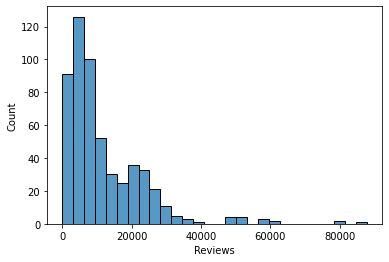

In [9]:
# ¿Cómo se distribuye la variable Review? Muéstra el histografa.
sns.histplot(data=df, x='Reviews')

Text(0.5, 1.0, 'Histograma de la distribucion de la variable Review')

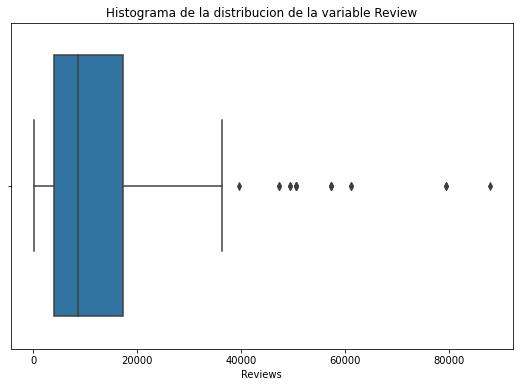

In [10]:
# Ahora muéstralo en un gráfico de caja y bigote.
# Tamaño de la imagen
fig = plt.figure(figsize=(9, 6))

# Gráfico boxplot
sns.boxplot(data=df, x='Reviews')

# Ejes y título
plt.title('Histograma de la distribucion de la variable Review')

Text(0.5, 1.0, 'Histograma de las reseñas de cada genero ')

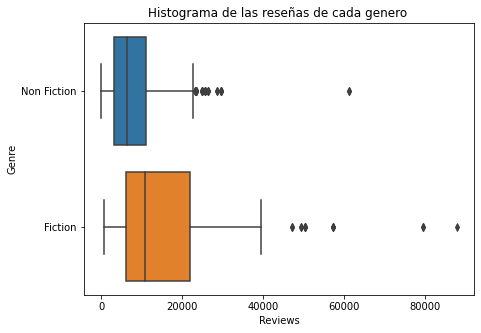

In [12]:
# ¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor 
# evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.
fig = plt.figure(figsize=(7,5))

# Gráfico boxplot
sns.boxplot(data=df, x='Reviews', y = 'Genre')

# Ejes y título
plt.title('Histograma de las reseñas de cada genero ')

Text(0, 0.5, 'Precios')

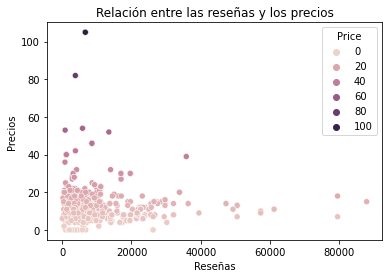

In [14]:
# ¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un
# gráfico de dispersión.
# Graficaremos la relación entre las reseñas y los precios

# Tamaño de la imagen.
fig = plt.figure(figsize=(6, 4))

# Gráfico scatterplot.
sns.scatterplot(data=df, x ='Reviews', y='Price', hue = 'Price')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre las reseñas y los precios')
plt.xlabel('Reseñas')
plt.ylabel('Precios')

Text(0, 0.5, 'Precios')

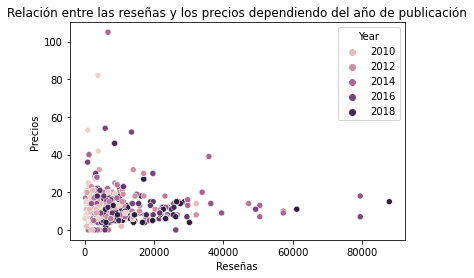

In [25]:
# De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la
# relación entre el número de reseñar, el precio y el año de publicación?
# IMPORTANTE: Selecciona una paleta de colores adeacuada.

# Gráfico scatterplot.
sns.scatterplot(data=df, x ='Reviews', y='Price', hue = 'Year')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre las reseñas y los precios dependiendo del año de publicación')
plt.xlabel('Reseñas')
plt.ylabel('Precios')

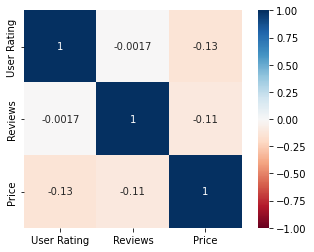

In [18]:
# ¿Cuál es la correlación entre las variables numéricas? Muéstralo en un 
# gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
df3 = pd.read_csv('bestsellers with categories.csv')
df3 = df3.drop('Year', axis=1)

# Vamos a graficar la matriz de correlación del dataset Iris
bestsellers_corr = df3.corr()

# Para graficar el mapa de calor usamos heatmap. No necesitamos especificar x ni y
sns.heatmap(data=bestsellers_corr, vmin=-1, vmax=1, cmap = 'RdBu', annot=True, square = True)

¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.

** Es evidente la escala del mapa de color va de -1 a 1. Esto representa la correlación entre las variables. Se observa que la correlación entre user rating & user rating es igual a 1, al igual que la correlación entre Reviews & Reviews, y Price & Price. En cada una de estas instancias la correlación es igual a 1, significan una fuerte relación positiva entre sí. Las variables con la relación negativa más fuerte son Price y User Rating. Su correlación negativa es de -0.13 **

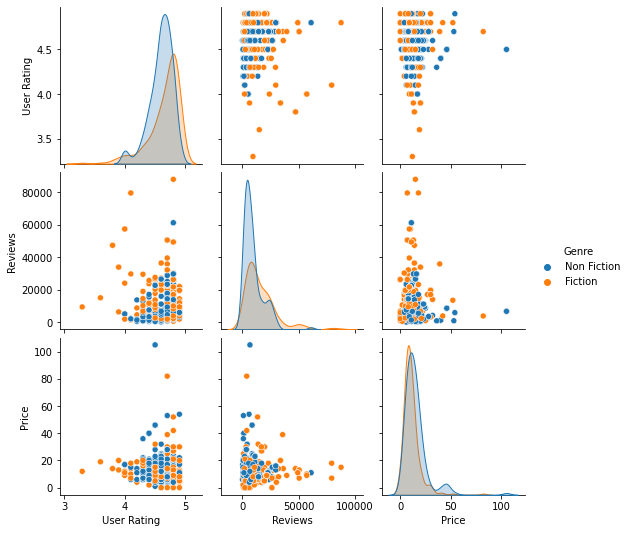

In [22]:
# Haz una gráfica donde podemos comparar la relación entre las tres variables 
# numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto
# del libro. La variable año, a pesar de ser numérica, la vamos a considerar como
# cualitativa, así que la eliminaremos del análisis.
# pairplot es una versión más compleja y grande del gráfico de dispersión.
sns.pairplot(data=df3, hue = 'Genre')
